### Data Understanding

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler


print("All packages installed successfully!")


All packages installed successfully!


Load Dataset

In [2]:

# Load the dataset
df = pd.read_csv("Food_Production.csv")

# Display basic info
print(df.info())



<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [3]:
# Show the first few rows
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.6,5.846154,18786.2,14450.92308,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.8,3.943662,49576.3,69825.77465,13449.891480


Check for Missing Values

In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]  # Show only columns with missing values


Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  13
Freshwater withdrawals per 100g protein (liters per 100g protein)          17
Freshwater withdrawals per kilogram (liters per kilogram)                   5
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               10
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       16
Land use per 1000kcal (m² per 1000kcal)                                    10
Land use per kilogram (m² per kilogram)                                     5
Land use per 100g protein (m² per 100g protein)                            16
Scarcity-weighted water use per kilogram (liters per kilogram)              5
Scarcity-weighted water use per 100g protein (liters per 100g pr

Summary Statistics

In [5]:
# Get summary statistics
df.describe()


,Land use change,Animal Feed,Farm,Processing,Transport,Packging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),Eutrophying emissions per kilogram (gPO₄eq per kilogram),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
count,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,43.000000,33.000000,38.000000,...,26.000000,38.000000,33.000000,27.000000,33.000000,38.000000,27.000000,38.000000,26.000000,30.000000
mean,1.260465,0.453488,3.469767,0.253488,0.195349,0.269767,0.069767,5.972093,27.181547,46.141316,...,1437.975324,932.605263,5.633943,13.524906,12.423165,29.264474,29.105042,36607.428947,59196.438503,17380.575408
std,3.357730,0.919200,7.083264,0.372475,0.158795,0.342633,0.110270,10.501753,46.445959,82.808808,...,1441.981970,1296.999186,10.613575,19.427462,28.348693,78.490074,49.307339,56891.283046,89928.189299,16232.080209
min,-2.100000,0.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.200000,0.708419,0.690000,...,32.375000,0.000000,0.069919,0.263319,0.273756,0.330000,3.000000,0.000000,421.250000,4.095023
25%,0.000000,0.000000,0.350000,0.000000,0.100000,0.100000,0.000000,0.850000,4.214932,3.752500,...,373.573281,105.500000,0.628415,4.027439,1.312500,1.112500,5.088235,3325.075000,11018.401008,2969.124983
50%,0.200000,0.000000,0.800000,0.100000,0.100000,0.100000,0.000000,1.600000,7.000000,11.460000,...,1083.327273,417.100000,1.351351,6.500000,2.976244,6.865000,7.936314,14533.050000,20917.213595,12605.256790
75%,0.800000,0.000000,2.200000,0.300000,0.200000,0.300000,0.150000,6.000000,26.324324,45.840000,...,1832.386339,1340.375000,5.335135,14.983333,6.605405,14.917500,23.002381,35960.175000,70651.721023,28056.471593
max,16.300000,2.900000,39.400000,1.300000,0.800000,1.600000,0.300000,59.600000,197.357143,365.290000,...,6003.333333,5605.200000,50.946429,93.300000,119.490842,369.810000,184.812594,229889.800000,431620.000000,49735.882350


Check Correlations

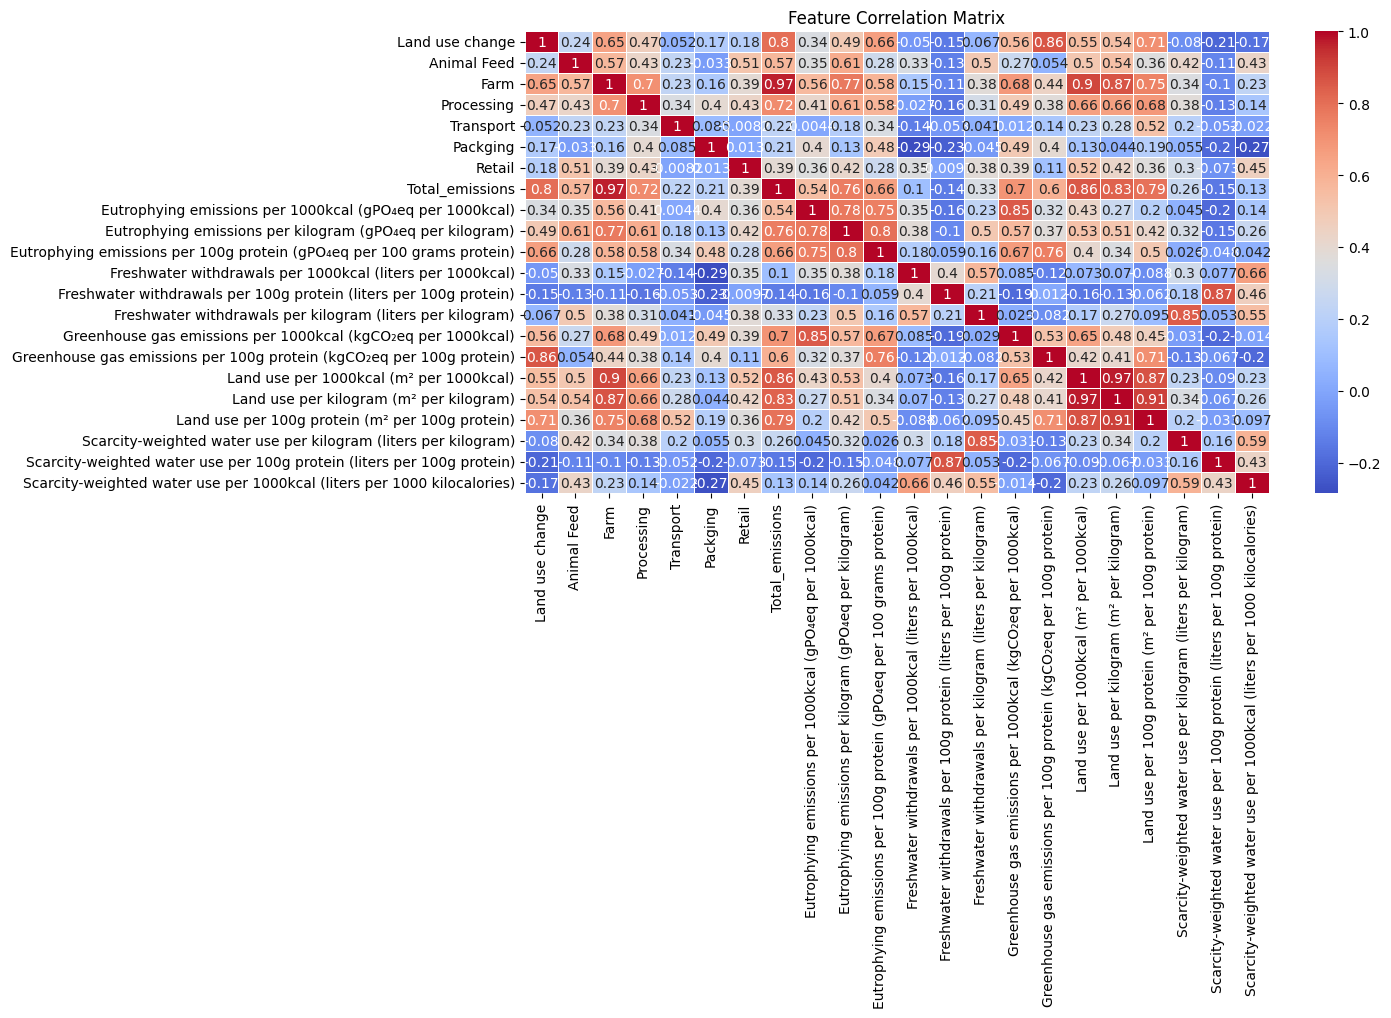

In [7]:
# Select only numeric columns for correlation
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


Visualize Key Features

1. Carbon Emissions Across Food Types 

In [6]:
fig = px.bar(df, x="Food product", y="Farm", title="Carbon Emissions at the Farm Level")
fig.show()


2. Land Use vs. Carbon Emissions

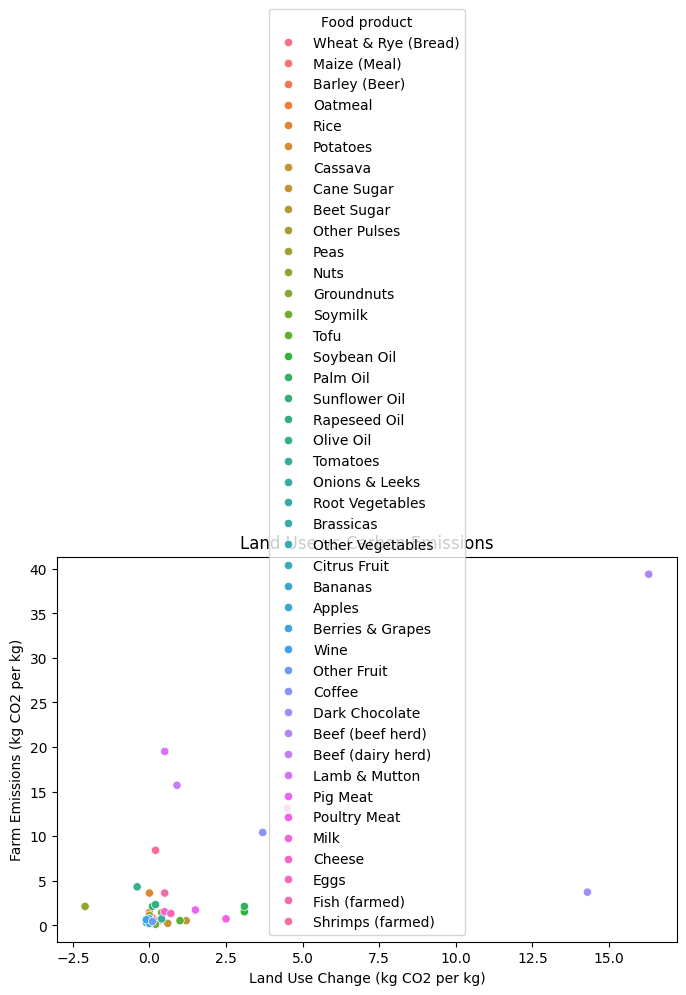

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Land use change", y="Farm", hue="Food product")
plt.title("Land Use vs Carbon Emissions")
plt.xlabel("Land Use Change (kg CO2 per kg)")
plt.ylabel("Farm Emissions (kg CO2 per kg)")
plt.show()


EDA

Uni

Distribution of Carbon Emissions by Food Product

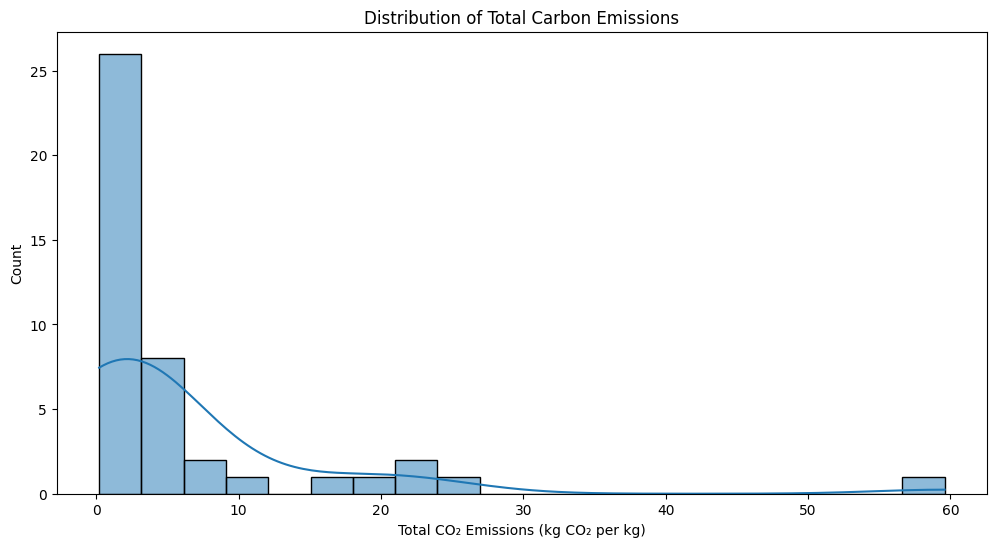

In [7]:
plt.figure(figsize=(12, 6))
sns.histplot(df["Total_emissions"], bins=20, kde=True)
plt.title("Distribution of Total Carbon Emissions")
plt.xlabel("Total CO₂ Emissions (kg CO₂ per kg)")
plt.ylabel("Count")
plt.show()


Highest Emissions by Food

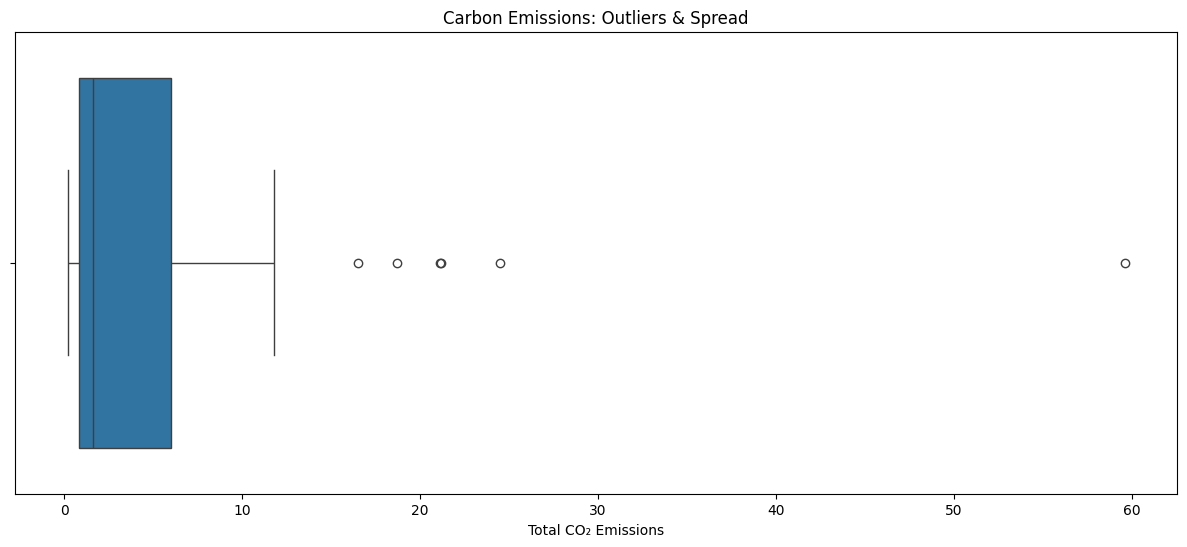

In [8]:
plt.figure(figsize=(15, 6))
sns.boxplot(x=df["Total_emissions"])
plt.title("Carbon Emissions: Outliers & Spread")
plt.xlabel("Total CO₂ Emissions")
plt.show()


Biv

Land Use vs. Carbon Emissions

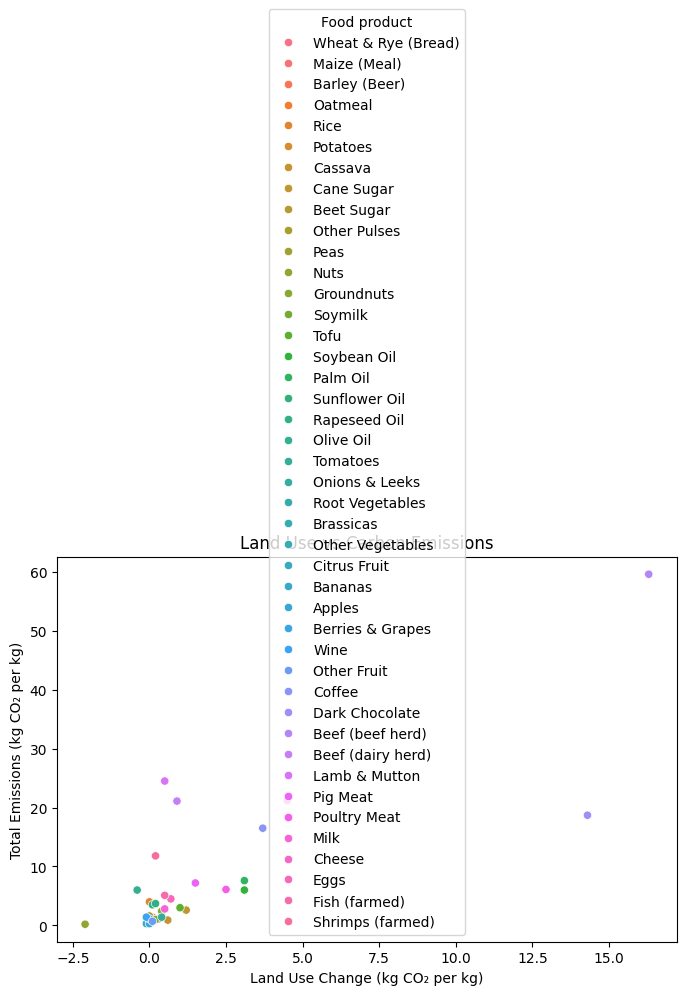

In [9]:
plt.figure(figsize=(8, 5))
sns.scatterplot(data=df, x="Land use change", y="Total_emissions", hue="Food product")
plt.title("Land Use vs Carbon Emissions")
plt.xlabel("Land Use Change (kg CO₂ per kg)")
plt.ylabel("Total Emissions (kg CO₂ per kg)")
plt.show()


Multi

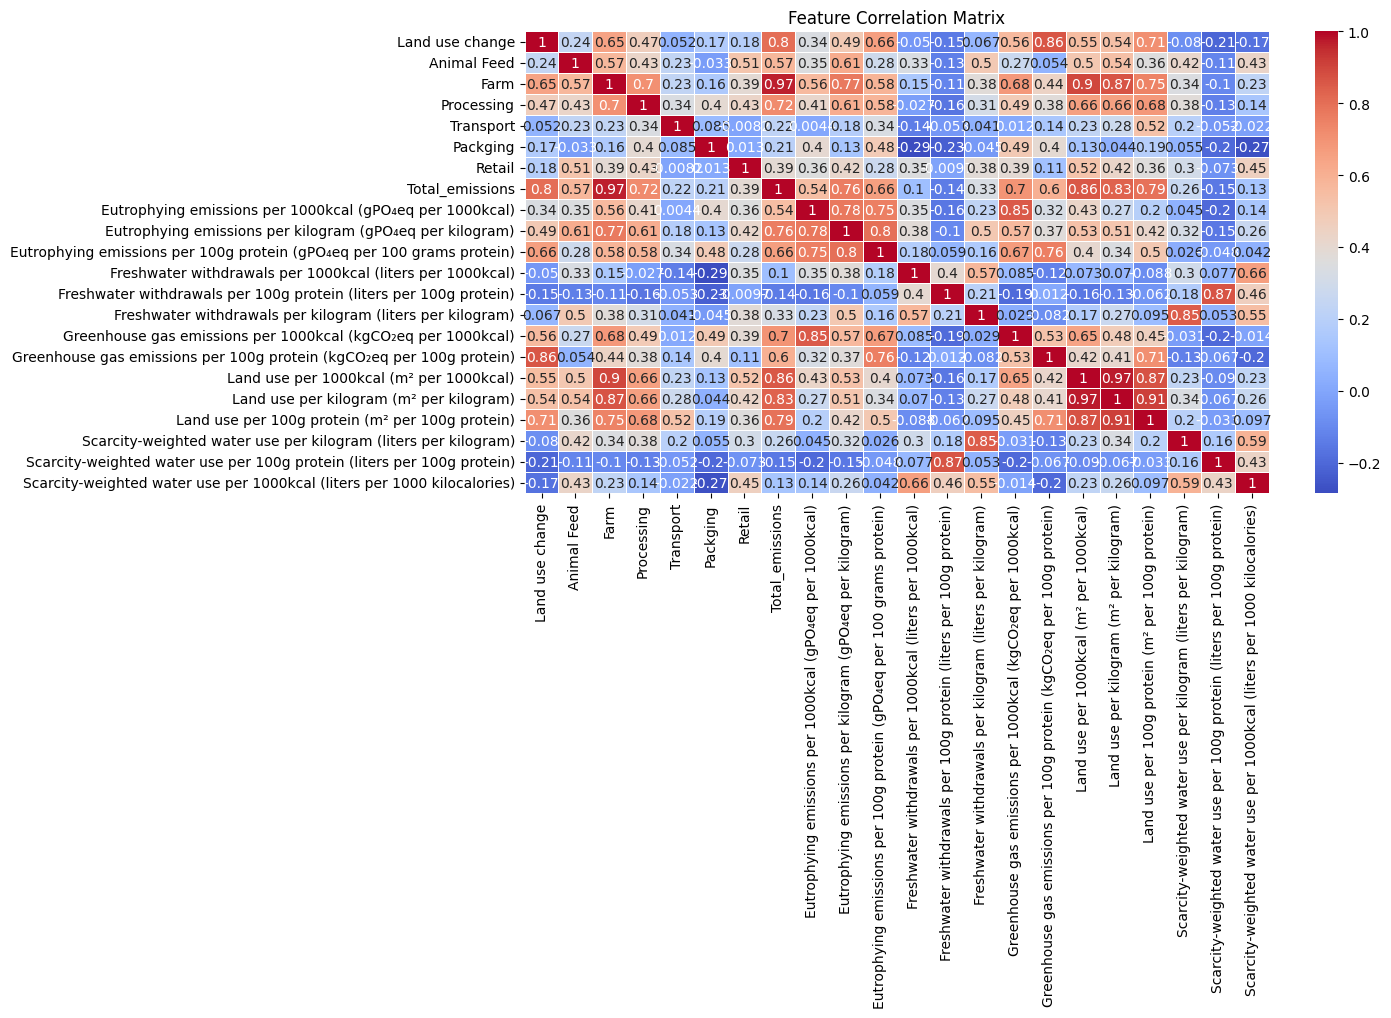

In [10]:
# Select numeric columns
numeric_df = df.select_dtypes(include=['float64', 'int64'])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Feature Correlation Matrix")
plt.show()


### Data Preparation

Clean Data

In [11]:
# Checking for missing values
# Calculate percentage of missing values
missing_percentage = (df.isnull().sum() / len(df)) * 100
print(missing_percentage[missing_percentage > 0])


Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   23.255814
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   11.627907
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      37.209302
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  30.232558
Freshwater withdrawals per 100g protein (liters per 100g protein)          39.534884
Freshwater withdrawals per kilogram (liters per kilogram)                  11.627907
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               23.255814
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       37.209302
Land use per 1000kcal (m² per 1000kcal)                                    23.255814
Land use per kilogram (m² per kilogram)                                    11.627907
Land use per 100g protein (m² per 100g protein)                            37.209302
Scarcity-weighted water use per kilogram (liters per kilogram)   

In [12]:
# Check for missing values in the dataframe
missing_values = df.isnull().sum()

# Display columns with missing values
print(missing_values[missing_values > 0])


Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   10
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                    5
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      16
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  13
Freshwater withdrawals per 100g protein (liters per 100g protein)          17
Freshwater withdrawals per kilogram (liters per kilogram)                   5
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               10
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       16
Land use per 1000kcal (m² per 1000kcal)                                    10
Land use per kilogram (m² per kilogram)                                     5
Land use per 100g protein (m² per 100g protein)                            16
Scarcity-weighted water use per kilogram (liters per kilogram)              5
Scarcity-weighted water use per 100g protein (liters per 100g pr

Check for Outliers to use Mean or Median to fill missing values

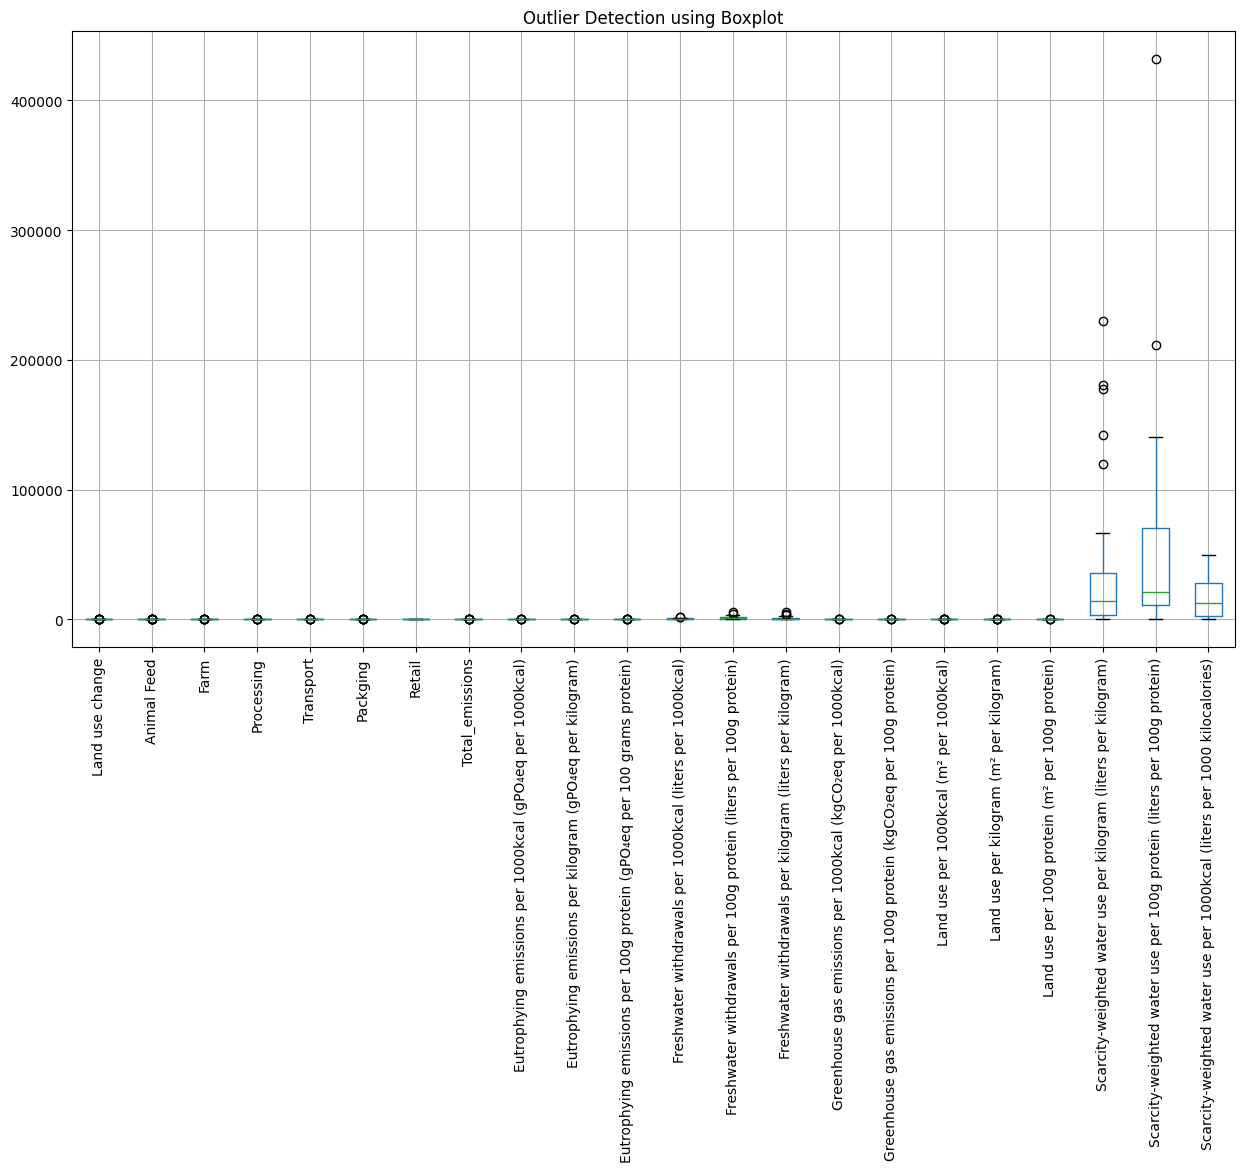

Land use change                                                            8
Animal Feed                                                               10
Farm                                                                       6
Processing                                                                 5
Transport                                                                  5
Packging                                                                   7
Total_emissions                                                            6
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   4
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   4
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      4
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  2
Freshwater withdrawals per 100g protein (liters per 100g protein)          2
Freshwater withdrawals per kilogram (liters per kilogram)                  3

In [13]:
# Select only numerical columns
num_cols = df.select_dtypes(include=np.number).columns

# Plot boxplots for each numerical column
plt.figure(figsize=(15, 8))
df[num_cols].boxplot(rot=90)
plt.title("Outlier Detection using Boxplot")
plt.show()

# IQR Method to detect outliers
Q1 = df[num_cols].quantile(0.25)
Q3 = df[num_cols].quantile(0.75)
IQR = Q3 - Q1

# Outliers: Any value < Q1 - 1.5*IQR or > Q3 + 1.5*IQR
outliers = ((df[num_cols] < (Q1 - 1.5 * IQR)) | (df[num_cols] > (Q3 + 1.5 * IQR)))

# Count outliers per column
outlier_counts = outliers.sum()
outlier_counts[outlier_counts > 0]


Land use per kilogram (m² per kilogram)                                    3.862069
Farm                                                                       3.721835
Land use change                                                            3.689864
Total_emissions                                                            3.618267
Land use per 1000kcal (m² per 1000kcal)                                    3.434621
Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal)               3.362409
Scarcity-weighted water use per 100g protein (liters per 100g protein)     3.230308
Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein)       3.119120
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   2.762100
Land use per 100g protein (m² per 100g protein)                            2.526165
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   2.524743
Scarcity-weighted water use per kilogram (liters per kilogram)             2

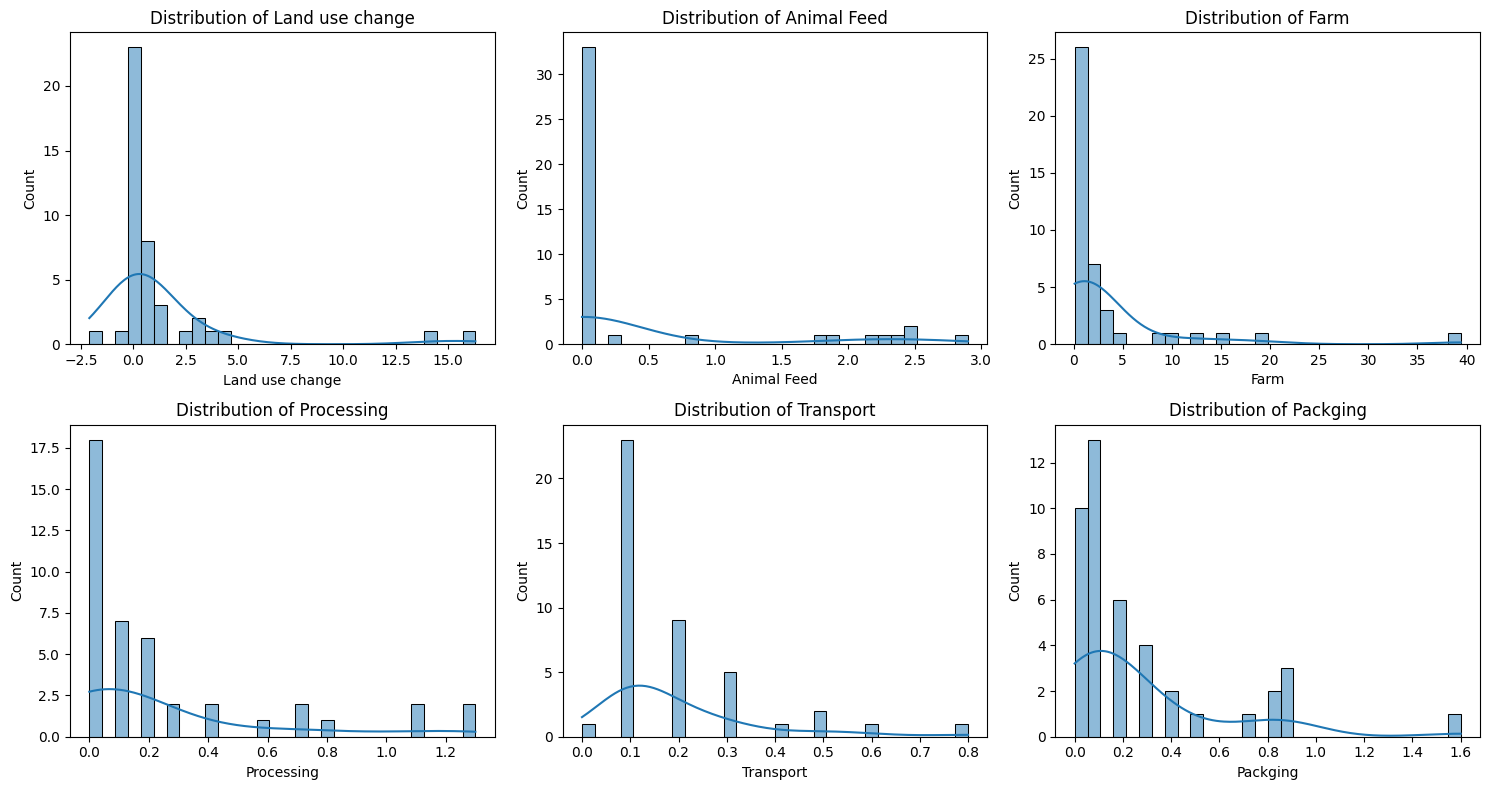

In [15]:
# Calculate skewness for each numerical column
skewness = df[num_cols].skew().sort_values(ascending=False)
print(skewness)

# Visualize distributions
plt.figure(figsize=(15, 8))
for i, col in enumerate(num_cols[:6]):  # Checking first 6 columns
    plt.subplot(2, 3, i+1)
    sns.histplot(df[col], bins=30, kde=True)
    plt.title(f'Distribution of {col}')
plt.tight_layout()
plt.show()


Fiil Missing vlaues with Median

In [16]:
# Fill missing values with the median of each column except the "Food product" column, which is categorical
df.fillna(df.select_dtypes(include=['float64']).median(), inplace=True)

# Display the updated dataframe
print(df.info())  # To confirm no more missing values


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packging                                                                 43 

In [17]:
# confirm changes made
df.isnull().sum()

Food product                                                               0
Land use change                                                            0
Animal Feed                                                                0
Farm                                                                       0
Processing                                                                 0
Transport                                                                  0
Packging                                                                   0
Retail                                                                     0
Total_emissions                                                            0
Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal)                   0
Eutrophying emissions per kilogram (gPO₄eq per kilogram)                   0
Eutrophying emissions per 100g protein (gPO₄eq per 100 grams protein)      0
Freshwater withdrawals per 1000kcal (liters per 1000kcal)                  0

Data Quality

In [18]:
# Fix Column Name Typo ("Packging" → "Packaging")
df.rename(columns={"Packging": "Packaging"}, inplace=True)

In [19]:
# Ensure "Food product" is Properly Formatted
df["Food product"] = df["Food product"].str.strip()

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 23 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packaging                                                                43 

In [21]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Freshwater withdrawals per 100g protein (liters per 100g protein),Freshwater withdrawals per kilogram (liters per kilogram),Greenhouse gas emissions per 1000kcal (kgCO₂eq per 1000kcal),Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.000000,...,1083.327273,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.000000,...,1083.327273,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.000000,...,1083.327273,417.1,1.351351,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,371.076923,482.4,0.945482,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,3166.760563,2248.4,1.207271,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480


In [22]:
# Display all 43 rows
pd.set_option('display.max_rows', 43)
print(df)


           Food product  Land use change  Animal Feed  Farm  Processing  \
0   Wheat & Rye (Bread)              0.1          0.0   0.8         0.2   
1          Maize (Meal)              0.3          0.0   0.5         0.1   
2         Barley (Beer)              0.0          0.0   0.2         0.1   
3               Oatmeal              0.0          0.0   1.4         0.0   
4                  Rice              0.0          0.0   3.6         0.1   
5              Potatoes              0.0          0.0   0.2         0.0   
6               Cassava              0.6          0.0   0.2         0.0   
7            Cane Sugar              1.2          0.0   0.5         0.0   
8            Beet Sugar              0.0          0.0   0.5         0.2   
9          Other Pulses              0.0          0.0   1.1         0.0   
10                 Peas              0.0          0.0   0.7         0.0   
11                 Nuts             -2.1          0.0   2.1         0.0   
12           Groundnuts  

**Feature Engineering**

Create some useful new columns make analysis easier

'Category' column (Food Category for Plant vs Animal)

In [23]:

# Display unique food products
food_products = df["Food product"].unique()
food_products


array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [24]:
# Define plant-based and animal-based food lists
plant_based = [
    "Wheat & Rye (Bread)", "Maize (Meal)", "Barley (Beer)", "Oatmeal", "Rice", "Potatoes", "Cassava",
    "Cane Sugar", "Beet Sugar", "Soybean Oil", "Palm Oil", "Sunflower Oil", "Rapeseed Oil", "Olive Oil",
    "Other Pulses", "Peas", "Nuts", "Groundnuts", "Soymilk", "Tofu",
    "Tomatoes", "Onions & Leeks", "Root Vegetables", "Brassicas", "Other Vegetables",
    "Citrus Fruit", "Bananas", "Apples", "Berries & Grapes", "Other Fruit",
    "Wine", "Coffee", "Dark Chocolate"
]

animal_based = [
    "Beef (beef herd)", "Beef (dairy herd)", "Lamb & Mutton", "Pig Meat", "Poultry Meat",
    "Milk", "Cheese", "Eggs",
    "Fish (farmed)", "Shrimps (farmed)"
]

# Assign category to a new column
df["Category"] = df["Food product"].apply(lambda x: "Plant-Based" if x in plant_based else "Animal-Based")

# Check the result
df[["Food product", "Category"]].head(10)


,Food product,Category
0,Wheat & Rye (Bread),Plant-Based
1,Maize (Meal),Plant-Based
2,Barley (Beer),Plant-Based
3,Oatmeal,Plant-Based
4,Rice,Plant-Based
5,Potatoes,Plant-Based
6,Cassava,Plant-Based
7,Cane Sugar,Plant-Based
8,Beet Sugar,Plant-Based
9,Other Pulses,Plant-Based


Total Water Use and Total Land Use

In [25]:
#  need all columns that measure water consumption.

water_columns = [col for col in df.columns if "water" in col.lower() or "withdrawals" in col.lower()]
print(water_columns)


['Freshwater withdrawals per 1000kcal (liters per 1000kcal)', 'Freshwater withdrawals per 100g protein (liters per 100g protein)', 'Freshwater withdrawals per kilogram (liters per kilogram)', 'Scarcity-weighted water use per kilogram (liters per kilogram)', 'Scarcity-weighted water use per 100g protein (liters per 100g protein)', 'Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)']


In [26]:
# also need all columns that measure land footprint

land_columns = [col for col in df.columns if "land use" in col.lower()]
print(land_columns)


['Land use change', 'Land use per 1000kcal (m² per 1000kcal)', 'Land use per kilogram (m² per kilogram)', 'Land use per 100g protein (m² per 100g protein)']


Now create the Total Water Use and Total Land Use

In [27]:
df["Total Water Use"] = df[
    [
        "Freshwater withdrawals per 1000kcal (liters per 1000kcal)",
        "Freshwater withdrawals per 100g protein (liters per 100g protein)",
        "Freshwater withdrawals per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per kilogram (liters per kilogram)",
        "Scarcity-weighted water use per 100g protein (liters per 100g protein)",
        "Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories)"
    ]
].sum(axis=1)


In [28]:
df["Total Land Use"] = df[
    [
        "Land use change",
        "Land use per 1000kcal (m² per 1000kcal)",
        "Land use per kilogram (m² per kilogram)",
        "Land use per 100g protein (m² per 100g protein)"
    ]
].sum(axis=1)


In [29]:
# confirm changes made

df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,1.4,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,17.877558
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,1.1,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,18.077558
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,1.1,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,49894.007070,17.777558
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,1.6,4.281357,...,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461,Plant-Based,41436.616016,16.343600
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,4.0,9.514379,...,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480,Plant-Based,138877.110415,7.503293


**Standardization & Scaling**

In [30]:

scaler = StandardScaler()
df[["Total_emissions", "Total Water Use", "Total Land Use"]] = scaler.fit_transform(
    df[["Total_emissions", "Total Water Use", "Total Land Use"]]
)


In [31]:
df[["Total_emissions", "Total Water Use", "Total Land Use"]].describe()


,Total_emissions,Total Water Use,Total Land Use
count,4.300000e+01,4.300000e+01,4.300000e+01
mean,1.420053e-16,6.196594e-17,2.969201e-17
std,1.011835e+00,1.011835e+00,1.011835e+00
min,-5.561361e-01,-8.825663e-01,-4.023539e-01
25%,-4.935092e-01,-5.676334e-01,-3.423360e-01
50%,-4.212473e-01,-4.335943e-01,-3.032245e-01
75%,2.688813e-03,1.015520e-01,-2.295384e-01
max,5.167002e+00,3.536182e+00,4.485722e+00


**Hypothesis Testing**

1. Hypothesis Testing for Total Emissions

Null Hypothesis (H₀): There is no significant difference in environmental impact(Total Emissions)  between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher environmental impact(Total Emissions)  than plant-based foods.

Assumption Check


Normality Check (Shapiro-Wilk Test): Ensures that Total_emissions follows a normal distribution for both Plant-Based and Animal-Based foods.

Variance Check (Levene’s Test): Ensures that the two groups have similar variance.

In [32]:
from scipy.stats import shapiro, levene

# Separate the groups
plant_emissions = df[df["Category"] == "Plant-Based"]["Total_emissions"]
animal_emissions = df[df["Category"] == "Animal-Based"]["Total_emissions"]

# 1️⃣ Normality Test (Shapiro-Wilk Test)
shapiro_plant = shapiro(plant_emissions)
shapiro_animal = shapiro(animal_emissions)

print(f"Shapiro Test for Plant-Based: p-value = {shapiro_plant.pvalue:.4f}")
print(f"Shapiro Test for Animal-Based: p-value = {shapiro_animal.pvalue:.4f}")

# 2️⃣ Variance Test (Levene’s Test)
levene_test = levene(plant_emissions, animal_emissions)
print(f"Levene’s Test for Equal Variance: p-value = {levene_test.pvalue:.4f}")


Shapiro Test for Plant-Based: p-value = 0.0000
Shapiro Test for Animal-Based: p-value = 0.0040
Levene’s Test for Equal Variance: p-value = 0.0018


**📊 Interpretation of Results**

1️⃣ Shapiro-Wilk Normality Test

Plant-Based (p-value = 0.0000) → 🚨 Not Normal

Animal-Based (p-value = 0.0040) → 🚨 Not Normal
🔹 Since both distributions are NOT normal (p < 0.05), we cannot use the t-test.


2️⃣ Levene’s Test for Equal Variance

p-value = 0.0018 → 🚨 Variances are NOT equal
🔹 This means if we were using a t-test, we would have needed Welch’s t-test, but since normality doesn’t hold, we won’t use it.

**🚀 Best Test to Use:** Mann-Whitney U Test

Since the data is not normally distributed, we will use the Mann-Whitney U test, which is a non-parametric alternative to the t-test.

**Perform Mann-Whitney U Test**

In [33]:
from scipy.stats import mannwhitneyu

# Perform Mann-Whitney U test (alternative="greater" since we assume animal-based emissions > plant-based)
u_stat, p_value = mannwhitneyu(plant_emissions, animal_emissions, alternative="greater")

print(f"Mann-Whitney U Test Results: U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")


Mann-Whitney U Test Results: U-statistic = 27.0000, p-value = 1.0000


📊 Interpretation of Mann-Whitney U Test Results
U-statistic = 27.0000 (Not directly meaningful but used to compute p-value)

p-value = 1.0000 🚨

❌ Decision: Fail to Reject H₀
Since p-value > 0.05, we fail to reject the null hypothesis. This means:

✅ There is no significant difference in environmental impact (Total Emissions) between plant-based and animal-based foods.

This could mean that some plant-based foods (like; nuts, oils, other fruits) contribute heavily to emissions, balancing out the difference.

In [37]:
# Compare median emissions of both groups

print(df.groupby("Category")["Total_emissions"].median())


Category
Animal-Based    0.339911
Plant-Based    -0.440517
Name: Total_emissions, dtype: float64


📊 Interpretation of Median Emissions

Animal-Based Median Emissions: 0.3399

Plant-Based Median Emissions: -0.4405

Even though animal-based foods have a higher median emission, the hypothesis test showed no statistically significant difference because of high variability in emissions across plant-based foods.

This suggests:

✅ Some plant-based foods (e.g., nuts, oils, chocolate, wine) have high emissions, balancing the difference.

✅ The distribution of emissions is wide, making it hard to detect a clear statistical difference.



2. Hypothesis Testing for Water Use

Null Hypothesis (H₀): There is no significant difference in Water Use between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher Water Use than plant-based foods.

In [36]:
from scipy.stats import mannwhitneyu

# Test if animal-based foods use significantly more water than plant-based
u_stat, p_value = mannwhitneyu(df[df["Category"] == "Plant-Based"]["Total Water Use"],
                               df[df["Category"] == "Animal-Based"]["Total Water Use"],
                               alternative="greater")

print(f"Mann-Whitney U Test (Water Use): U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")


Mann-Whitney U Test (Water Use): U-statistic = 91.0000, p-value = 0.9840


Mann-Whitney U Test for Water Use

U-statistic = 91.0000

p-value = 0.9840 🚨 (Greater than 0.05)

Decision: We fail to reject H₀ → No significant difference in water use between plant-based and animal-based foods.

3. Hypothesis for Land Use

Null Hypothesis (H₀): There is no significant difference in Land Use between plant-based and animal-based foods.

Alternative Hypothesis (H₁): Animal-based foods have a significantly higher land use than plant-based foods.

In [38]:
# Test if animal-based foods use significantly more land than plant-based
u_stat, p_value = mannwhitneyu(df[df["Category"] == "Plant-Based"]["Total Land Use"],
                               df[df["Category"] == "Animal-Based"]["Total Land Use"],
                               alternative="greater")

print(f"Mann-Whitney U Test (Land Use): U-statistic = {u_stat:.4f}, p-value = {p_value:.4f}")


Mann-Whitney U Test (Land Use): U-statistic = 59.0000, p-value = 0.9989


Mann-Whitney U Test for Land Use

U-statistic = 59.0000

p-value = 0.9989 🚨 (Greater than 0.05)

Decision: We fail to reject H₀ → No significant difference in land use between plant-based and animal-based foods.

Summary of Hypothesis Testing

In [40]:
# Create the summary table
hypothesis_results = pd.DataFrame({
    "Metric": ["Total Emissions", "Total Water Use", "Total Land Use"],
    "U-statistic": [27.0000, 91.0000, 59.0000],
    "p-value": [1.0000, 0.9840, 0.9989],
    "Result": ["No significant difference", "No significant difference", "No significant difference"]
})

# Display the table
hypothesis_results


,Metric,U-statistic,p-value,Result
0,Total Emissions,27.0,1.0000,No significant difference
1,Total Water Use,91.0,0.9840,No significant difference
2,Total Land Use,59.0,0.9989,No significant difference


### **Business Analytical Questions**


1. Which food products have the highest and lowest carbon emissions?

In [41]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Greenhouse gas emissions per 100g protein (kgCO₂eq per 100g protein),Land use per 1000kcal (m² per 1000kcal),Land use per kilogram (m² per kilogram),Land use per 100g protein (m² per 100g protein),Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,-0.440517,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.303957
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,-0.469422,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.302492
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,-0.469422,7.000000,...,6.500000,2.976244,6.865,7.936314,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.304689
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,-0.421247,4.281357,...,1.907692,2.897446,7.600,5.846154,18786.20,14450.923080,7162.104461,Plant-Based,-0.512000,-0.315193
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,-0.190009,9.514379,...,6.267606,0.759631,2.800,3.943662,49576.30,69825.774650,13449.891480,Plant-Based,0.391336,-0.379946


In [42]:
# Sort by Total Emissions (Highest to Lowest)
top_5_highest = df.sort_values(by="Total_emissions", ascending=False).head(5)
top_5_lowest = df.sort_values(by="Total_emissions", ascending=True).head(5)

# Display results
print("Top 5 Highest Carbon Emission Foods:\n", top_5_highest[["Food product", "Total_emissions"]])
print("\nTop 5 Lowest Carbon Emission Foods:\n", top_5_lowest[["Food product", "Total_emissions"]])


Top 5 Highest Carbon Emission Foods:
          Food product  Total_emissions
33   Beef (beef herd)         5.167002
35      Lamb & Mutton         1.785148
39             Cheese         1.467196
34  Beef (dairy herd)         1.457561
32     Dark Chocolate         1.226323

Top 5 Lowest Carbon Emission Foods:
        Food product  Total_emissions
11             Nuts        -0.556136
5          Potatoes        -0.546501
21   Onions & Leeks        -0.546501
22  Root Vegetables        -0.546501
25     Citrus Fruit        -0.546501


2. How do plant-based vs. animal-based foods compare in environmental impact?

              Total_emissions  Total Water Use  Total Land Use
Category                                                      
Animal-Based         1.003756         0.358221        0.812474
Plant-Based         -0.304169        -0.108552       -0.246204


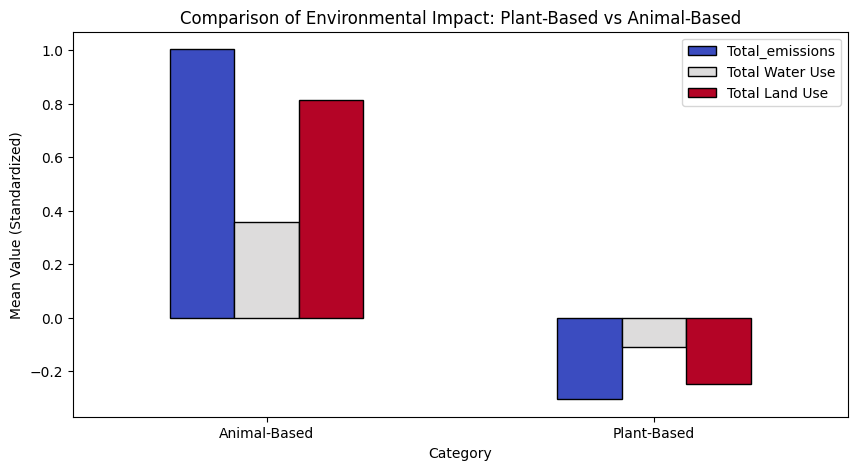

In [43]:
# Group by Category and calculate mean emissions, water, and land use
category_means = df.groupby("Category")[["Total_emissions", "Total Water Use", "Total Land Use"]].mean()

# Display results
print(category_means)

# Visualize
category_means.plot(kind="bar", figsize=(10, 5), colormap="coolwarm", edgecolor="black")
plt.title("Comparison of Environmental Impact: Plant-Based vs Animal-Based")
plt.ylabel("Mean Value (Standardized)")
plt.xticks(rotation=0)
plt.show()


3. What is the correlation between Land use, Water use and Emissions?

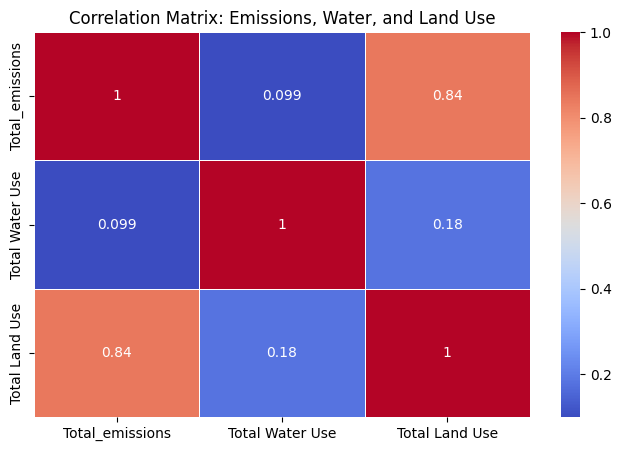

In [44]:
# Compute correlation matrix
correlation_matrix = df[["Total_emissions", "Total Water Use", "Total Land Use"]].corr()

# Plot heatmap
plt.figure(figsize=(8, 5))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Matrix: Emissions, Water, and Land Use")
plt.show()


4. Which food production stage contributes most to Emissions?

Farm               3.469767
Land use change    1.260465
Animal Feed        0.453488
Packaging          0.269767
Processing         0.253488
Transport          0.195349
Retail             0.069767
dtype: float64


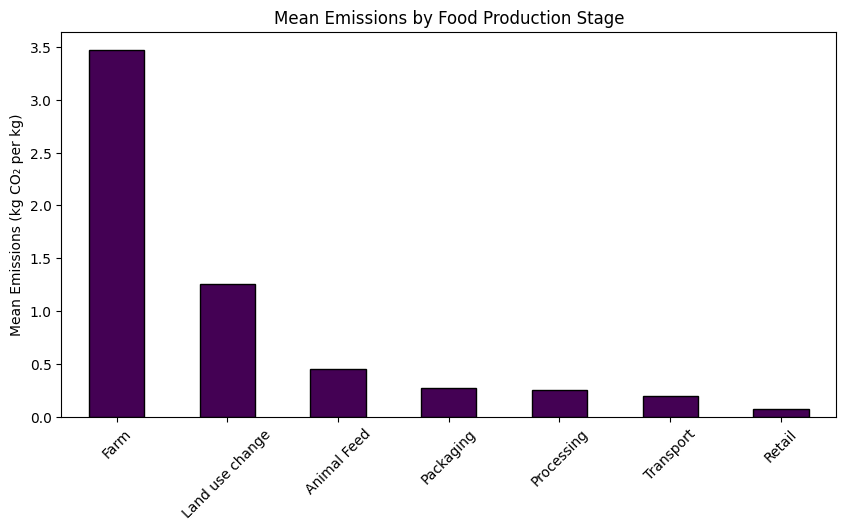

In [45]:
# Select only production stage columns
stage_columns = ["Land use change", "Animal Feed", "Farm", "Processing", "Transport", "Packaging", "Retail"]

# Compute mean emissions per stage
stage_means = df[stage_columns].mean().sort_values(ascending=False)

# Display results
print(stage_means)

# Visualize
stage_means.plot(kind="bar", figsize=(10, 5), colormap="viridis", edgecolor="black")
plt.title("Mean Emissions by Food Production Stage")
plt.ylabel("Mean Emissions (kg CO₂ per kg)")
plt.xticks(rotation=45)
plt.show()


5. How do different food categories imoact the environment?

In [46]:
# List all unique food products
unique_foods = df["Food product"].unique()
unique_foods


array(['Wheat & Rye (Bread)', 'Maize (Meal)', 'Barley (Beer)', 'Oatmeal',
       'Rice', 'Potatoes', 'Cassava', 'Cane Sugar', 'Beet Sugar',
       'Other Pulses', 'Peas', 'Nuts', 'Groundnuts', 'Soymilk', 'Tofu',
       'Soybean Oil', 'Palm Oil', 'Sunflower Oil', 'Rapeseed Oil',
       'Olive Oil', 'Tomatoes', 'Onions & Leeks', 'Root Vegetables',
       'Brassicas', 'Other Vegetables', 'Citrus Fruit', 'Bananas',
       'Apples', 'Berries & Grapes', 'Wine', 'Other Fruit', 'Coffee',
       'Dark Chocolate', 'Beef (beef herd)', 'Beef (dairy herd)',
       'Lamb & Mutton', 'Pig Meat', 'Poultry Meat', 'Milk', 'Cheese',
       'Eggs', 'Fish (farmed)', 'Shrimps (farmed)'], dtype=object)

In [47]:
# Define mapping for food types
food_types = {
    "Wheat & Rye (Bread)": "Cereals & Grains",
    "Maize (Meal)": "Cereals & Grains",
    "Barley (Beer)": "Cereals & Grains",
    "Oatmeal": "Cereals & Grains",
    "Rice": "Cereals & Grains",

    "Potatoes": "Root & Tubers",
    "Cassava": "Root & Tubers",

    "Cane Sugar": "Sugars",
    "Beet Sugar": "Sugars",

    "Other Pulses": "Legumes & Pulses",
    "Peas": "Legumes & Pulses",
    "Soymilk": "Legumes & Pulses",
    "Tofu": "Legumes & Pulses",

    "Nuts": "Nuts & Seeds",
    "Groundnuts": "Nuts & Seeds",

    "Soybean Oil": "Vegetable Oils",
    "Palm Oil": "Vegetable Oils",
    "Sunflower Oil": "Vegetable Oils",
    "Rapeseed Oil": "Vegetable Oils",
    "Olive Oil": "Vegetable Oils",

    "Tomatoes": "Vegetables",
    "Onions & Leeks": "Vegetables",
    "Root Vegetables": "Vegetables",
    "Brassicas": "Vegetables",
    "Other Vegetables": "Vegetables",

    "Citrus Fruit": "Fruits",
    "Bananas": "Fruits",
    "Apples": "Fruits",
    "Berries & Grapes": "Fruits",
    "Other Fruit": "Fruits",

    "Wine": "Beverages & Processed",
    "Coffee": "Beverages & Processed",
    "Dark Chocolate": "Beverages & Processed",

    "Beef (beef herd)": "Meat",
    "Beef (dairy herd)": "Meat",
    "Lamb & Mutton": "Meat",
    "Pig Meat": "Meat",
    "Poultry Meat": "Meat",

    "Milk": "Dairy & Eggs",
    "Cheese": "Dairy & Eggs",
    "Eggs": "Dairy & Eggs",

    "Fish (farmed)": "Seafood",
    "Shrimps (farmed)": "Seafood"
}

# Assign new Food Type column
df["Food Type"] = df["Food product"].map(food_types)

# Display sample rows
df[["Food product", "Food Type"]].head(10)


,Food product,Food Type
0,Wheat & Rye (Bread),Cereals & Grains
1,Maize (Meal),Cereals & Grains
2,Barley (Beer),Cereals & Grains
3,Oatmeal,Cereals & Grains
4,Rice,Cereals & Grains
5,Potatoes,Root & Tubers
6,Cassava,Root & Tubers
7,Cane Sugar,Sugars
8,Beet Sugar,Sugars
9,Other Pulses,Legumes & Pulses


                       Total_emissions  Total Water Use  Total Land Use
Food Type                                                              
Beverages & Processed         0.600053        -0.746091        0.390503
Cereals & Grains             -0.398124        -0.284289       -0.321255
Dairy & Eggs                  0.339911         0.598156        0.110049
Fruits                       -0.513742         0.786213       -0.273827
Legumes & Pulses             -0.421247        -0.464076       -0.305016
Meat                          1.708068         0.455886        1.681206
Nuts & Seeds                 -0.450152         1.487904       -0.305023
Root & Tubers                -0.517596        -0.626603       -0.319035
Seafood                       0.238744        -0.245843       -0.305720
Sugars                       -0.382708        -0.532746       -0.354168
Vegetable Oils               -0.058975        -0.169512       -0.255086
Vegetables                   -0.519523        -0.361361       -0

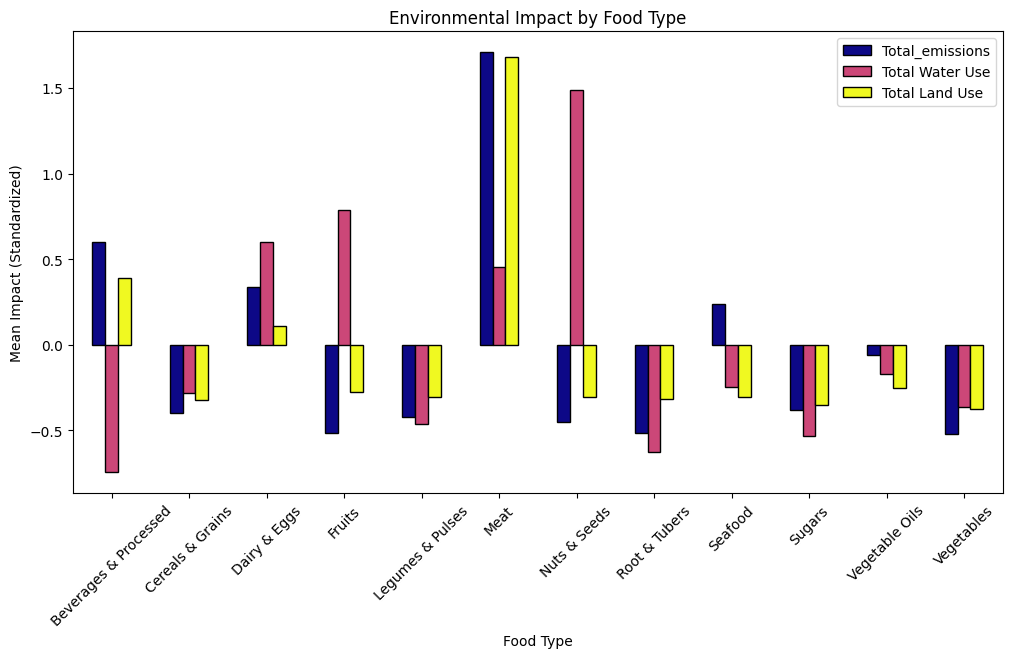

In [48]:
# Group by food type and calculate mean impact
food_type_means = df.groupby("Food Type")[["Total_emissions", "Total Water Use", "Total Land Use"]].mean()

# Display results
print(food_type_means)

# Visualize
food_type_means.plot(kind="bar", figsize=(12, 6), colormap="plasma", edgecolor="black")
plt.title("Environmental Impact by Food Type")
plt.ylabel("Mean Impact (Standardized)")
plt.xticks(rotation=45)
plt.show()


6. What are the top five contributors to Eutrophication?

In [49]:
# Sort foods by Eutrophying Emissions (first 5)
top_eutrophying = df.sort_values(by="Eutrophying emissions per kilogram (gPO₄eq per kilogram)", ascending=False).head(5)

# Display the top 5 contributors
print(top_eutrophying[["Food product", "Eutrophying emissions per kilogram (gPO₄eq per kilogram)"]])


         Food product  \
34  Beef (dairy herd)   
33   Beef (beef herd)   
41      Fish (farmed)   
31             Coffee   
39             Cheese   

    Eutrophying emissions per kilogram (gPO₄eq per kilogram)  
34                                             365.29         
33                                             301.41         
41                                             235.12         
31                                             110.52         
39                                              98.37         


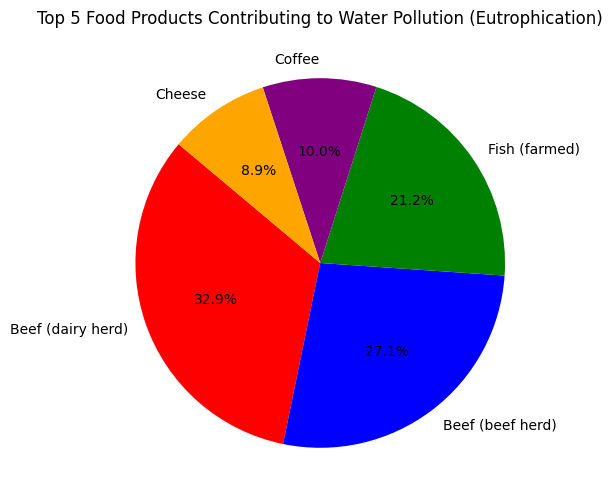

In [50]:
# Pie chart for top eutrophying foods
plt.figure(figsize=(8, 6))
plt.pie(top_eutrophying["Eutrophying emissions per kilogram (gPO₄eq per kilogram)"],
        labels=top_eutrophying["Food product"],
        autopct="%1.1f%%", startangle=140, colors=["red", "blue", "green", "purple", "orange"])

plt.title("Top 5 Food Products Contributing to Water Pollution (Eutrophication)")
plt.show()


7. Can we group foods based on their environmental impact using Clustering?

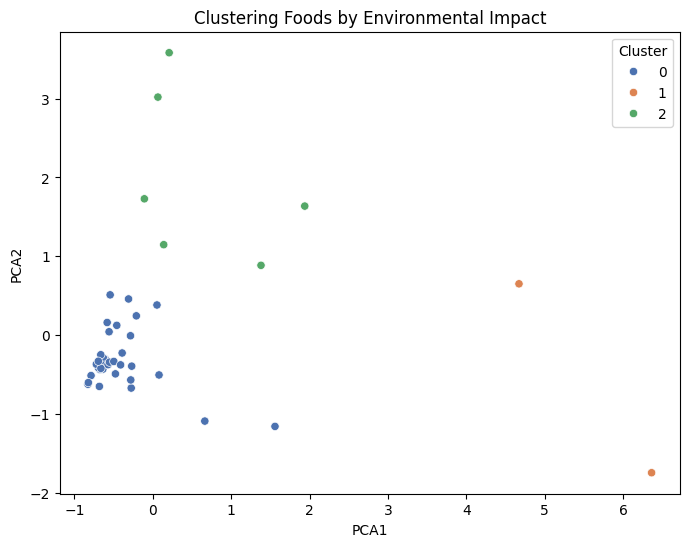

In [51]:
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA

# Select relevant features
X = df[["Total_emissions", "Total Water Use", "Total Land Use"]]

# Apply K-Means clustering (3 clusters)
kmeans = KMeans(n_clusters=3, random_state=42)
df["Cluster"] = kmeans.fit_predict(X)

# Reduce to 2D using PCA for visualization
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
df["PCA1"], df["PCA2"] = X_pca[:, 0], X_pca[:, 1]

# Plot Clusters
plt.figure(figsize=(8, 6))
sns.scatterplot(data=df, x="PCA1", y="PCA2", hue="Cluster", palette="deep")
plt.title("Clustering Foods by Environmental Impact")
plt.show()


In [52]:
df.head()

,Food product,Land use change,Animal Feed,Farm,Processing,Transport,Packaging,Retail,Total_emissions,Eutrophying emissions per 1000kcal (gPO₄eq per 1000kcal),...,Scarcity-weighted water use per kilogram (liters per kilogram),Scarcity-weighted water use per 100g protein (liters per 100g protein),Scarcity-weighted water use per 1000kcal (liters per 1000 kilocalories),Category,Total Water Use,Total Land Use,Food Type,Cluster,PCA1,PCA2
0,Wheat & Rye (Bread),0.1,0.0,0.8,0.2,0.1,0.1,0.1,-0.440517,7.000000,...,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.303957,Cereals & Grains,0,-0.607380,-0.301029
1,Maize (Meal),0.3,0.0,0.5,0.1,0.1,0.1,0.0,-0.469422,7.000000,...,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.302492,Cereals & Grains,0,-0.626163,-0.295320
2,Barley (Beer),0.0,0.0,0.2,0.1,0.0,0.5,0.3,-0.469422,7.000000,...,14533.05,20917.213595,12605.256790,Plant-Based,-0.433594,-0.304689,Cereals & Grains,0,-0.627691,-0.295090
3,Oatmeal,0.0,0.0,1.4,0.0,0.1,0.1,0.0,-0.421247,4.281357,...,18786.20,14450.923080,7162.104461,Plant-Based,-0.512000,-0.315193,Cereals & Grains,0,-0.619034,-0.380099
4,Rice,0.0,0.0,3.6,0.1,0.1,0.1,0.1,-0.190009,9.514379,...,49576.30,69825.774650,13449.891480,Plant-Based,0.391336,-0.379946,Cereals & Grains,0,-0.309270,0.459276


In [53]:
# save df as new_fp.csv
df.to_csv("new_fp.csv", index=False)


Further Analysis

In [54]:
import pandas as pd

# Load the dataset
fp = pd.read_csv("new_fp.csv")

# Display basic info
print(fp.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43 entries, 0 to 42
Data columns (total 30 columns):
 #   Column                                                                   Non-Null Count  Dtype  
---  ------                                                                   --------------  -----  
 0   Food product                                                             43 non-null     object 
 1   Land use change                                                          43 non-null     float64
 2   Animal Feed                                                              43 non-null     float64
 3   Farm                                                                     43 non-null     float64
 4   Processing                                                               43 non-null     float64
 5   Transport                                                                43 non-null     float64
 6   Packaging                                                                43 

Uni

                                                    count          mean  \
Land use change                                      43.0  1.260465e+00   
Animal Feed                                          43.0  4.534884e-01   
Farm                                                 43.0  3.469767e+00   
Processing                                           43.0  2.534884e-01   
Transport                                            43.0  1.953488e-01   
Packaging                                            43.0  2.697674e-01   
Retail                                               43.0  6.976744e-02   
Total_emissions                                      43.0  1.445872e-16   
Eutrophying emissions per 1000kcal (gPO₄eq per ...   43.0  2.248816e+01   
Eutrophying emissions per kilogram (gPO₄eq per ...   43.0  4.210860e+01   
Eutrophying emissions per 100g protein (gPO₄eq ...   43.0  4.702735e+01   
Freshwater withdrawals per 1000kcal (liters per...   43.0  4.539638e+02   
Freshwater withdrawals pe

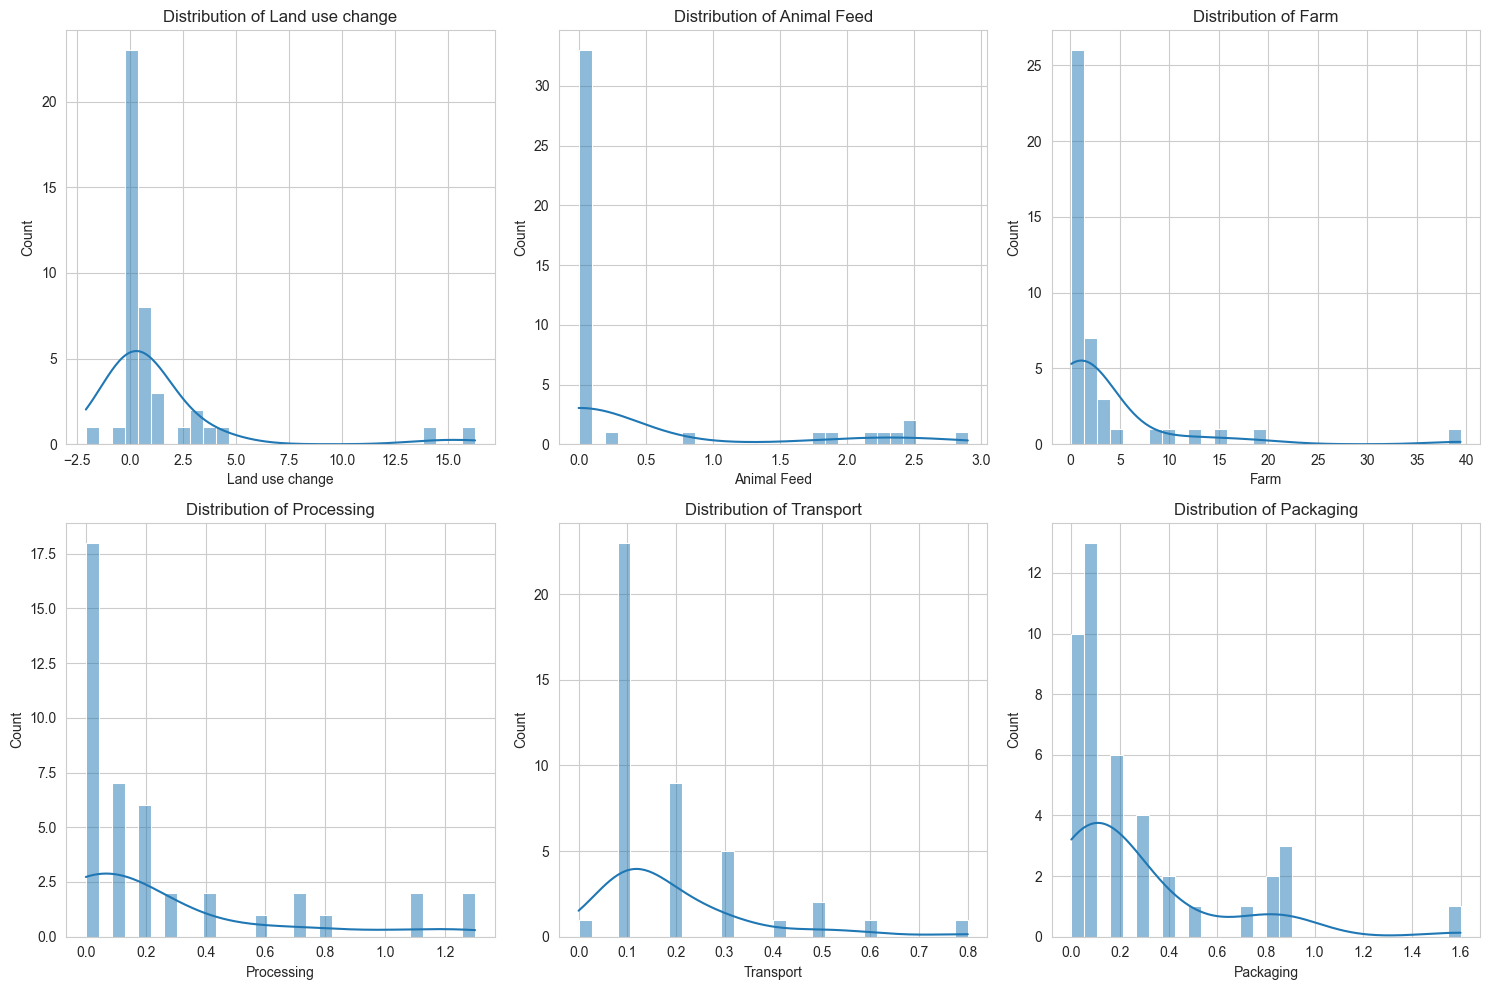

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set visualization style
sns.set_style("whitegrid")

# Summary statistics with skewness and kurtosis
univariate_stats = fp.describe().T
univariate_stats['Skewness'] = fp.skew(numeric_only=True)  # Apply to numeric columns only
univariate_stats['Kurtosis'] = fp.kurt(numeric_only=True)  # Apply to numeric columns only
print(univariate_stats)

# Histogram and KDE for numerical variables
num_cols = fp.select_dtypes(include=['float64', 'int64']).columns

plt.figure(figsize=(15, 10))
for i, col in enumerate(num_cols[:6]):  # Plot first 6 numerical variables
    plt.subplot(2, 3, i + 1)
    sns.histplot(fp[col], kde=True, bins=30)
    plt.title(f"Distribution of {col}")
plt.tight_layout()
plt.show()


Bi

d:\TMP_P_3\Environmental-Impact-of-Food-Production-Analysis\efpa\lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

d:\TMP_P_3\Environmental-Impact-of-Food-Production-Analysis\efpa\lib\site-packages\seaborn\utils.py:61: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.

d:\TMP_P_3\Environmental-Impact-of-Food-Production-Analysis\efpa\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8324 (\N{SUBSCRIPT FOUR}) missing from font(s) Arial.

d:\TMP_P_3\Environmental-Impact-of-Food-Production-Analysis\efpa\lib\site-packages\IPython\core\pylabtools.py:170: UserWarning:

Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.



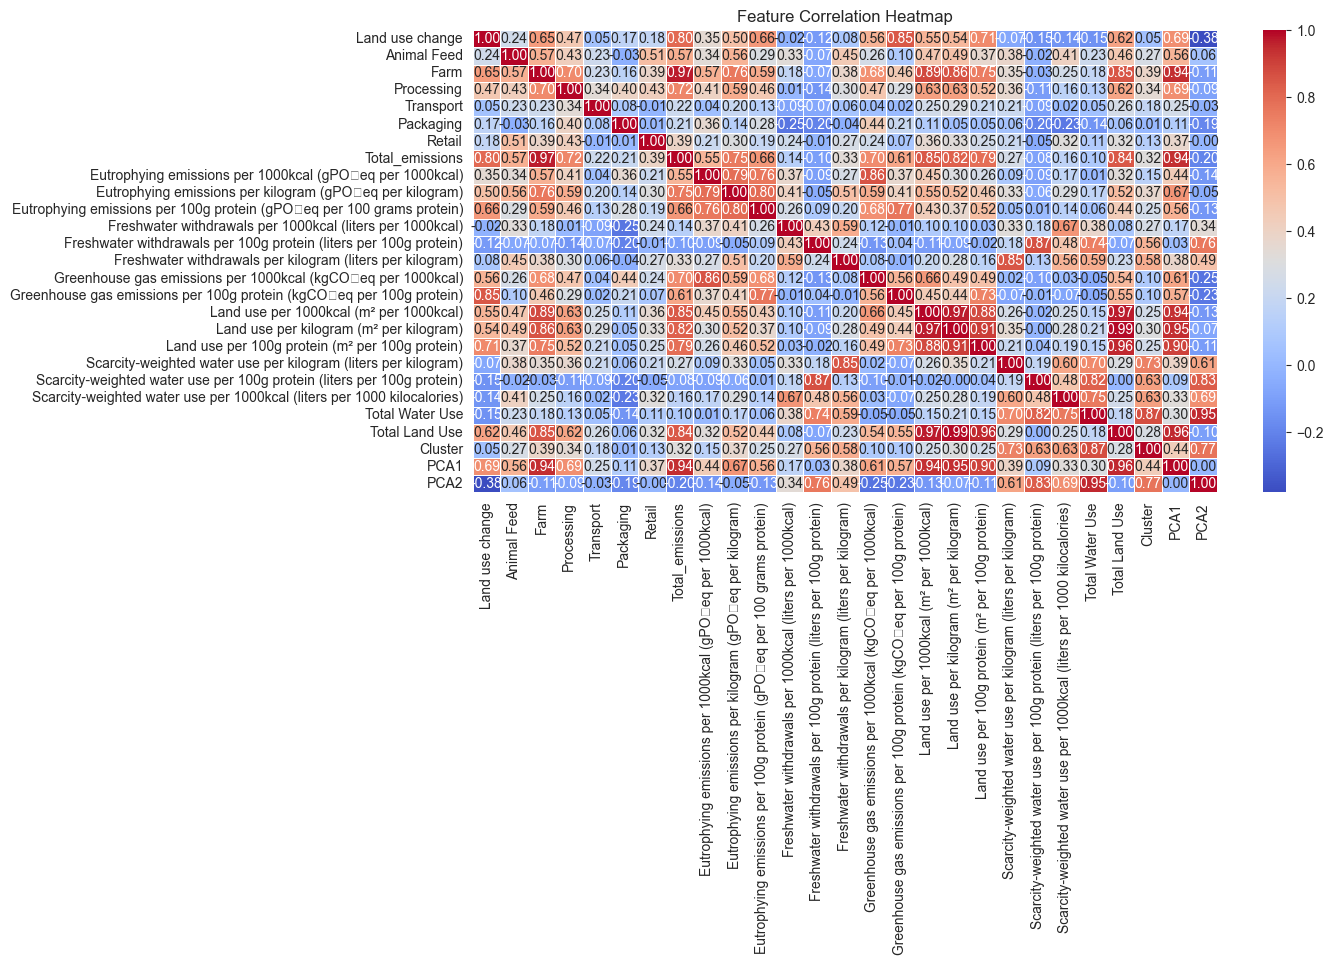

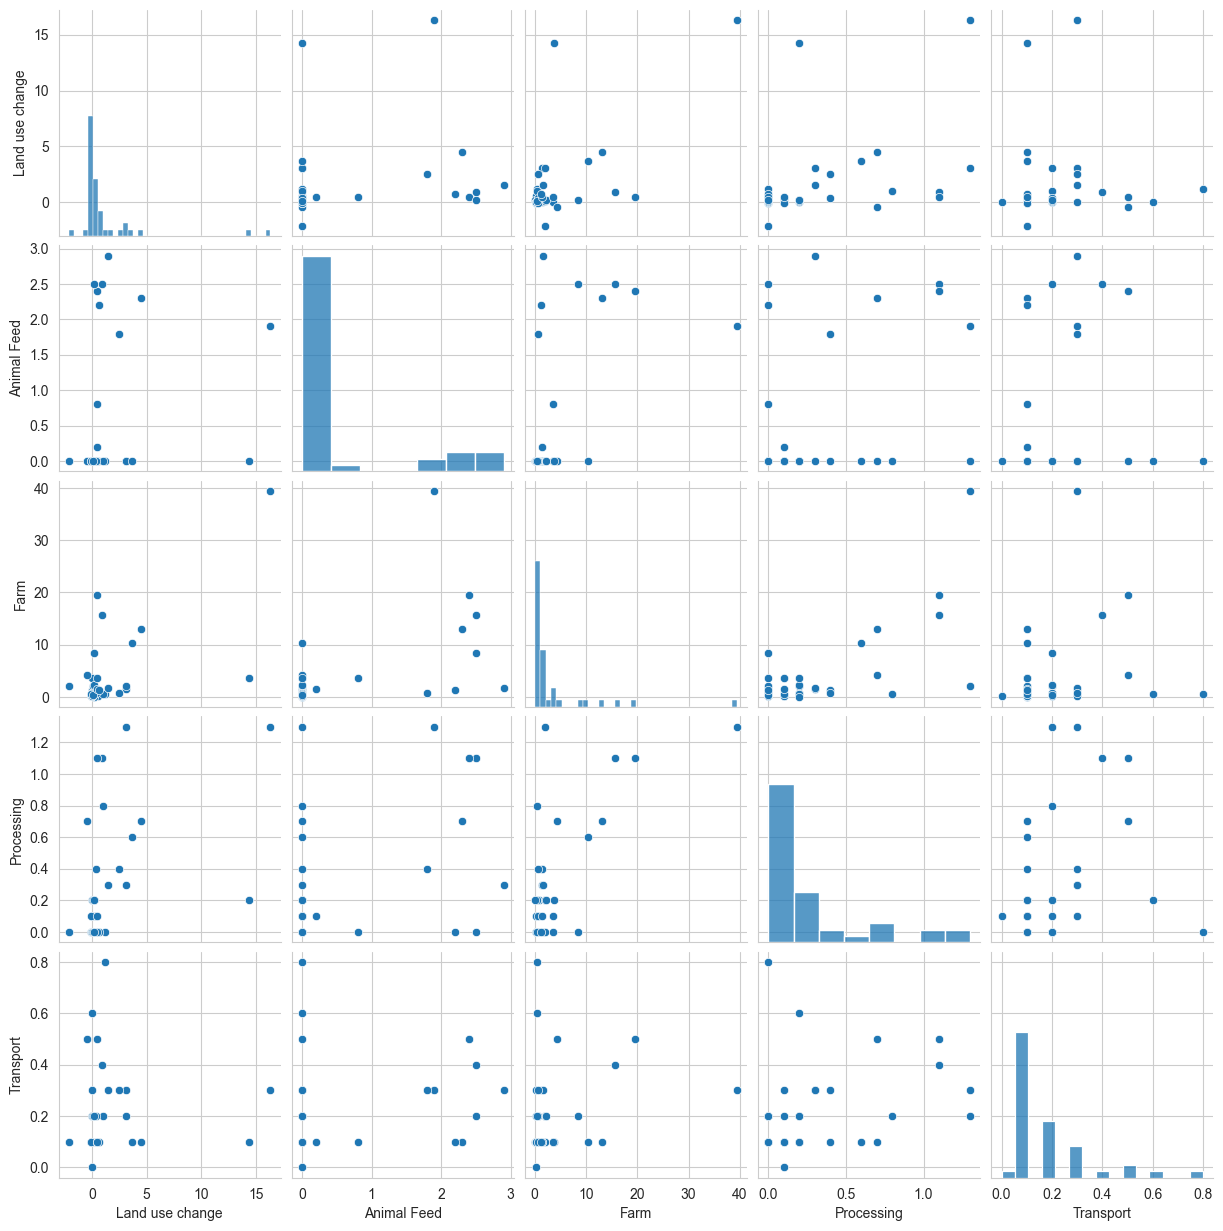

In [ ]:
# Select only numeric columns for correlation
numeric_fp = fp.select_dtypes(include=['number'])

# Correlation heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(numeric_fp.corr(), annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

# Select numeric columns for pairplot
selected_features = numeric_fp.columns[:5]

# Pairplot for selected numerical features
sns.pairplot(fp[selected_features])
plt.show()


Multi

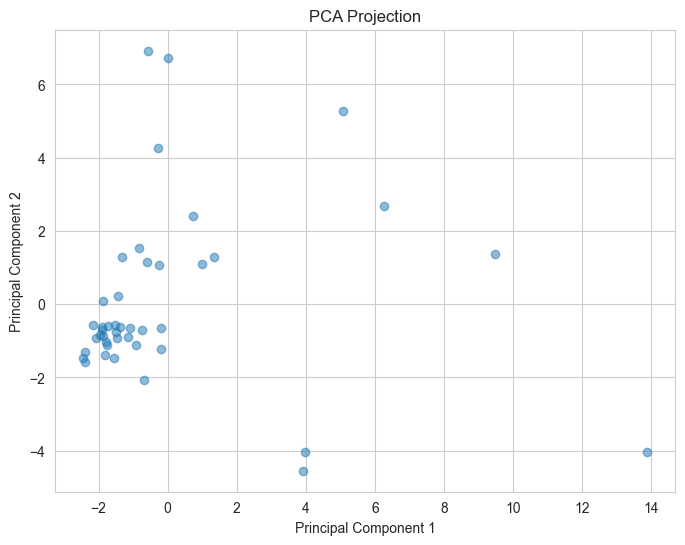

                                              Feature         VIF
0                                     Land use change         inf
1                                         Animal Feed         inf
2                                                Farm         inf
3                                          Processing         inf
4                                           Transport         inf
5                                           Packaging         inf
6                                              Retail         inf
7                                     Total_emissions         inf
8   Eutrophying emissions per 1000kcal (gPO₄eq per...  157.052165
9   Eutrophying emissions per kilogram (gPO₄eq per...   45.480425
10  Eutrophying emissions per 100g protein (gPO₄eq...   51.804047
11  Freshwater withdrawals per 1000kcal (liters pe...         inf
12  Freshwater withdrawals per 100g protein (liter...         inf
13  Freshwater withdrawals per kilogram (liters pe...         inf
14  Greenh

d:\TMP_P_3\Environmental-Impact-of-Food-Production-Analysis\efpa\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning:

divide by zero encountered in scalar divide



In [60]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Standardize data for PCA
scaler = StandardScaler()
scaled_data = scaler.fit_transform(fp.select_dtypes(include=['float64', 'int64']))

# PCA to reduce dimensions
pca = PCA(n_components=2)  # Reducing to 2 components for visualization
pca_results = pca.fit_transform(scaled_data)

# Scatter plot of PCA results
plt.figure(figsize=(8, 6))
plt.scatter(pca_results[:, 0], pca_results[:, 1], alpha=0.5)
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA Projection")
plt.show()

# VIF to check multicollinearity
vif_data = pd.DataFrame()
vif_data["Feature"] = fp.select_dtypes(include=['float64', 'int64']).columns
vif_data["VIF"] = [variance_inflation_factor(scaled_data, i) for i in range(scaled_data.shape[1])]
print(vif_data)
